In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 预设值
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None  # 展示所有列

In [3]:
# 初始数据
RAW_TRAIN = './datasets/serverless/train.csv'

# 1. 加载数据

In [4]:
# 加载原始数据
train_df = pd.read_csv(RAW_TRAIN)
train_df = train_df.sort_values(by=['QUEUE_ID', 'DOTTING_TIME']).reset_index(drop=True)

In [5]:
display(train_df)

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE
0,2,16,available,sql,x86_64,3,54,0,0,0,0,0,1590683100000,vm,20.0
1,2,16,available,sql,x86_64,2,54,0,0,0,0,0,1590683400000,vm,20.0
2,2,16,available,sql,x86_64,7,54,0,0,0,0,0,1590683700000,vm,20.0
3,2,16,available,sql,x86_64,4,54,0,0,0,0,0,1590684000000,vm,20.0
4,2,16,available,sql,x86_64,5,54,0,0,0,0,0,1590684120000,vm,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501725,87139,16,available,general,x86_64,3,36,0,0,0,0,0,1599867000000,vm,26.0
501726,87139,16,available,general,x86_64,2,36,0,0,0,0,0,1599867420000,vm,26.0
501727,87139,16,available,general,x86_64,3,36,0,0,0,0,0,1599867840000,vm,26.0
501728,87139,16,available,general,x86_64,2,36,0,0,0,0,0,1599868260000,vm,26.0


# 2. 数据探查

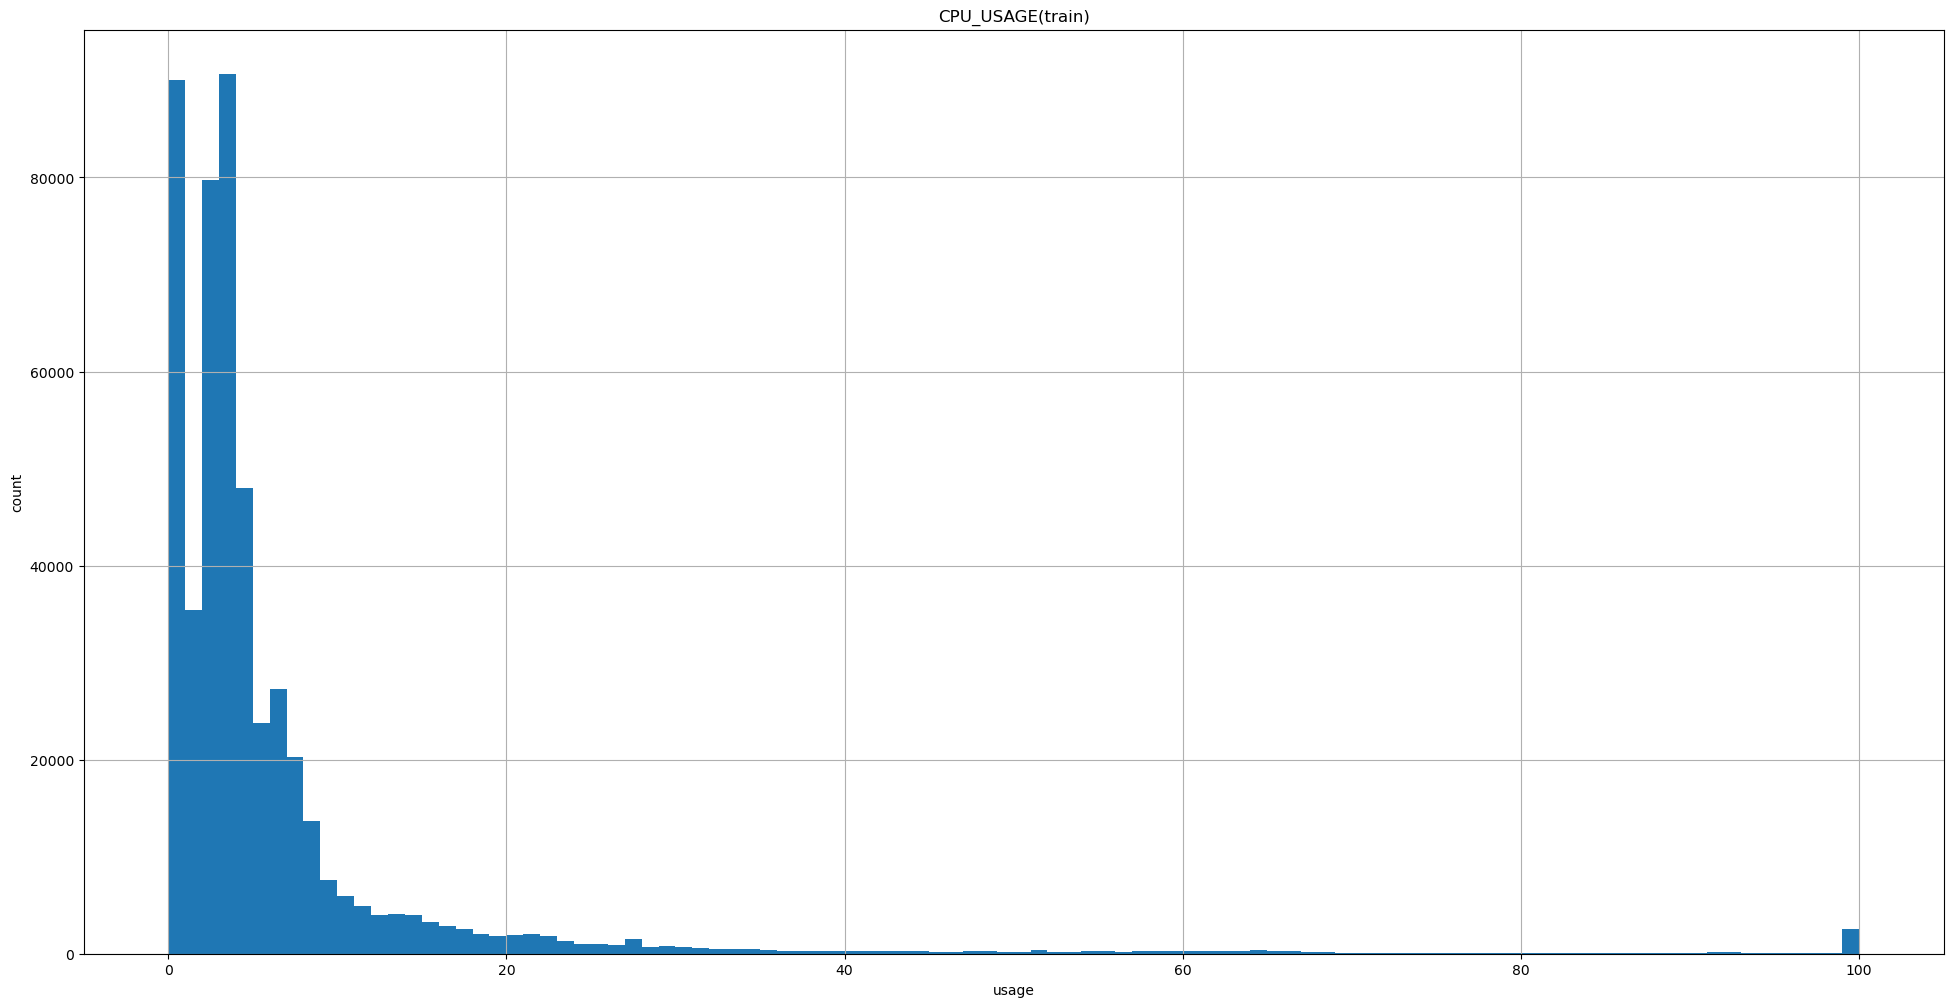

In [6]:
# CPU_USAGE分布图
train_cpu_hist = train_df['CPU_USAGE'].sort_index()

plt.figure(figsize=(24, 12))
plt.title('CPU_USAGE(train)')
plt.ylabel('count')
plt.xlabel('usage')
plt.grid(True)
plt.hist(train_cpu_hist, bins=100)
# plt.legend()  # 显示图例
plt.show()

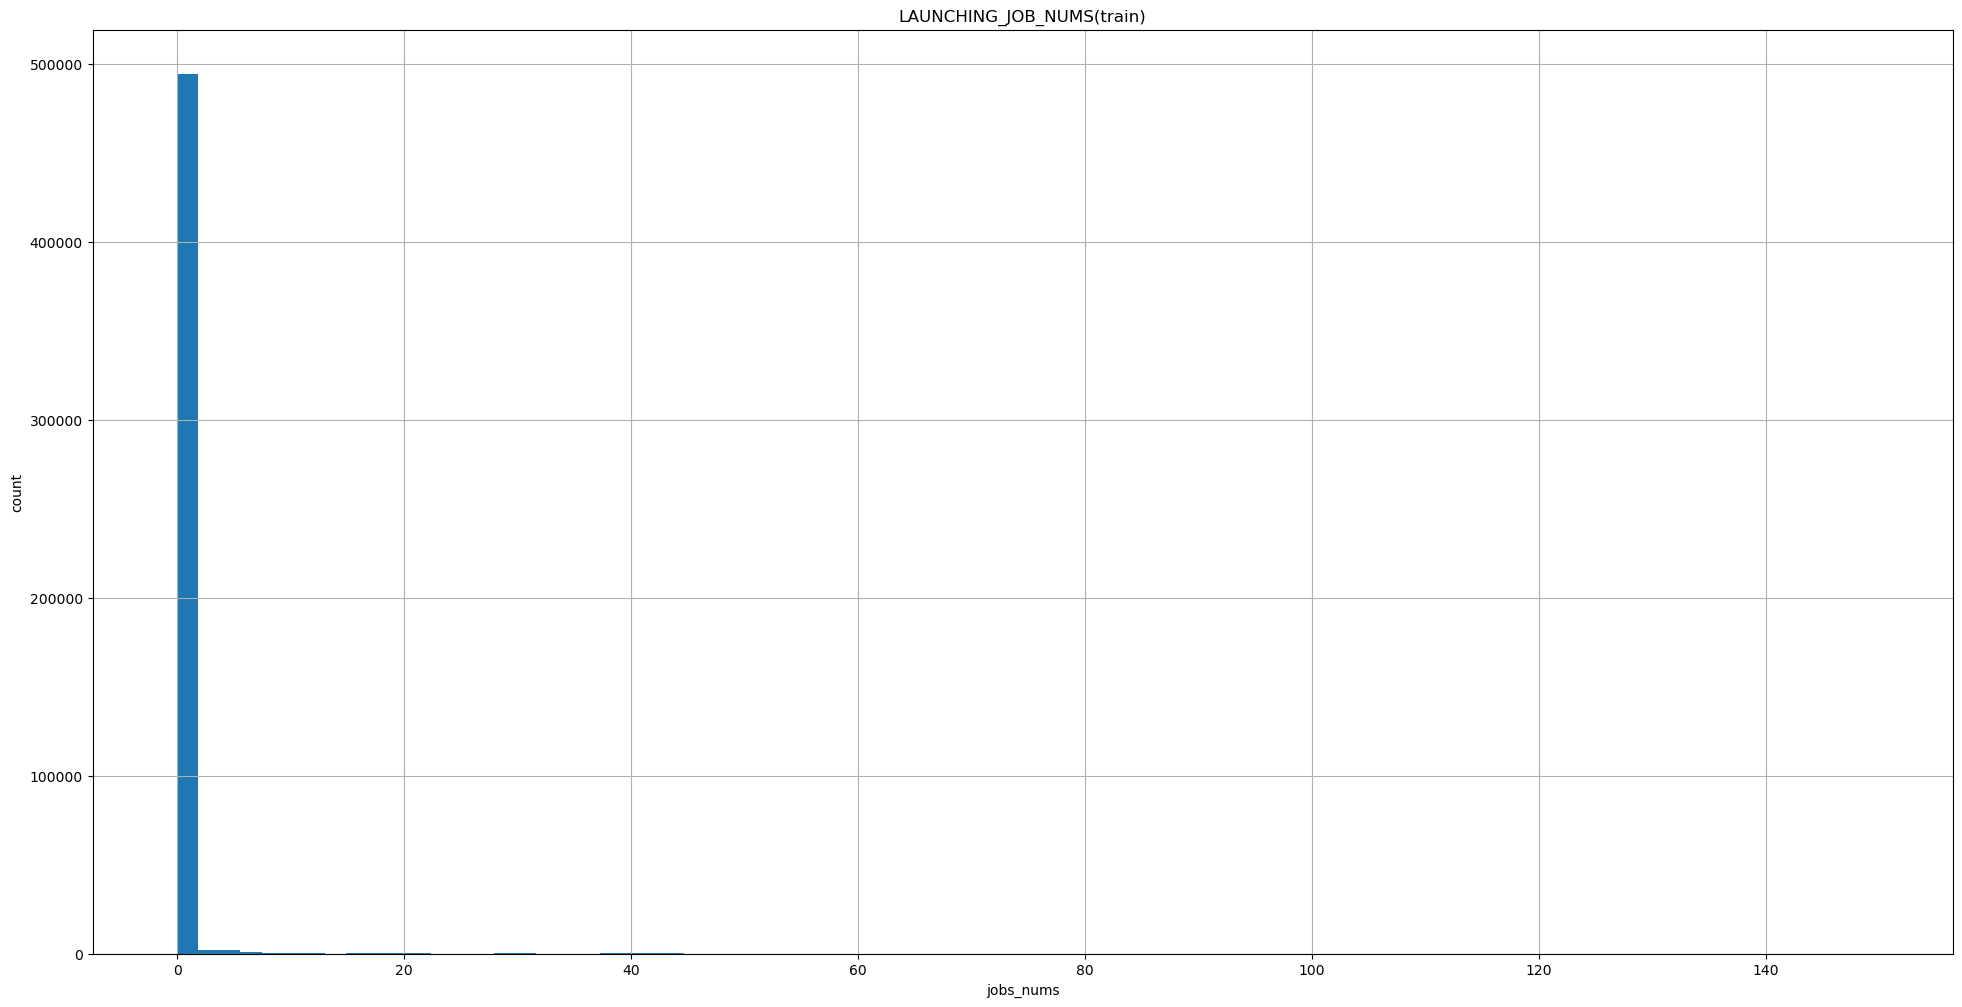

In [7]:
# LAUNCHING_JOB_NUMS分布图
train_jobs_hist = train_df['LAUNCHING_JOB_NUMS'].sort_index()

plt.figure(figsize=(24, 12))
plt.title('LAUNCHING_JOB_NUMS(train)')
plt.ylabel('count')
plt.xlabel('jobs_nums')
plt.grid(True)
plt.hist(train_jobs_hist, bins=80)
# plt.legend()  # 显示图例
plt.show()

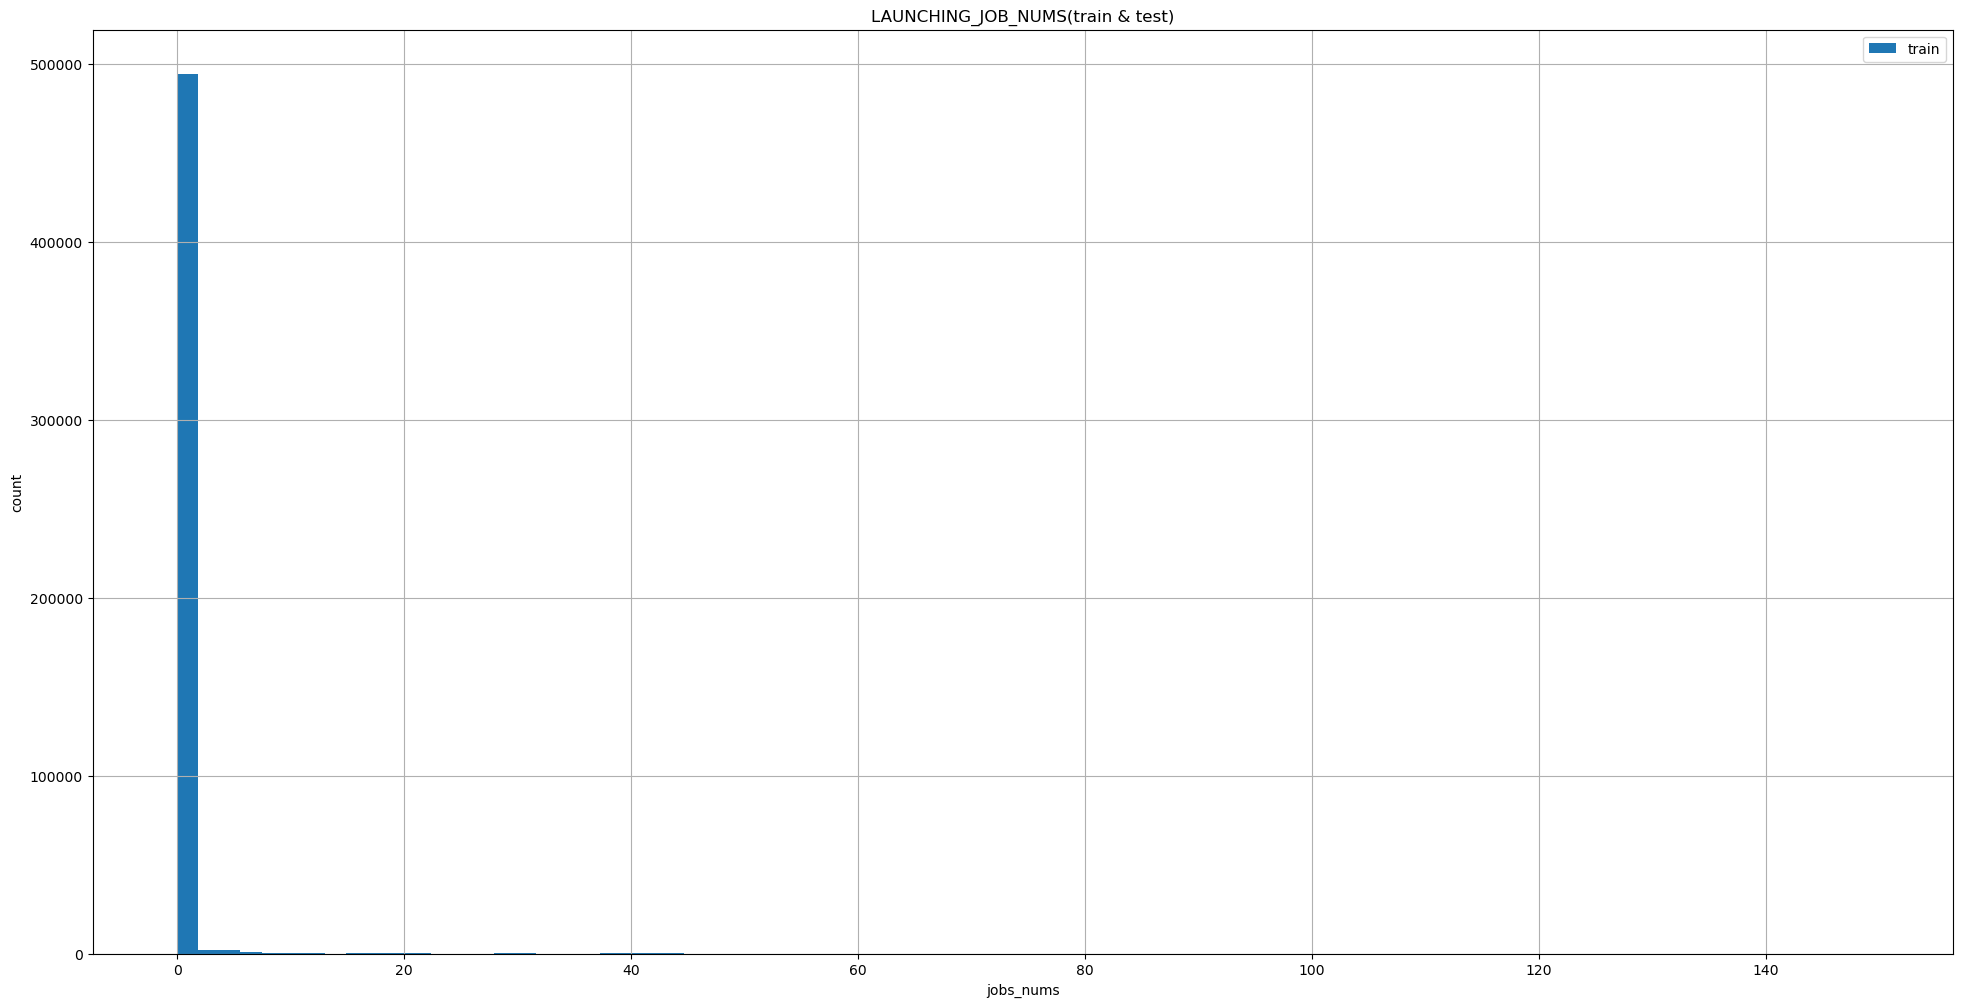

In [10]:
# LAUNCHING_JOB_NUMS分布图
train_jobs_hist = train_df['LAUNCHING_JOB_NUMS'].sort_index()

plt.figure(figsize=(24, 12))
plt.title('LAUNCHING_JOB_NUMS(train & test)')
plt.ylabel('count')
plt.xlabel('jobs_nums')
plt.grid(True)
plt.hist(train_jobs_hist, bins=80, label='train')
plt.legend()  # 显示图例
plt.show()

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE
449319,85731,16,available,general,x86_64,0,0,0,0,0,0,0,1594957500000,vm,0.0
449320,85731,16,available,general,x86_64,23,20,0,0,0,0,0,1594957920000,vm,29.0
449321,85731,16,available,general,x86_64,5,17,0,1,1,0,0,1594958280000,vm,29.0
449322,85731,16,available,general,x86_64,6,14,0,0,0,0,0,1594958760000,vm,29.0
449323,85731,16,available,general,x86_64,3,14,0,0,0,0,0,1594959120000,vm,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457882,85731,16,available,general,x86_64,2,23,0,0,0,0,0,1598225580000,vm,29.0
457883,85731,16,available,general,x86_64,2,23,0,0,0,0,0,1598225940000,vm,29.0
457884,85731,16,available,general,x86_64,2,23,0,0,0,0,0,1598226300000,vm,29.0
457885,85731,16,available,general,x86_64,7,23,0,0,0,0,0,1598226720000,vm,29.0


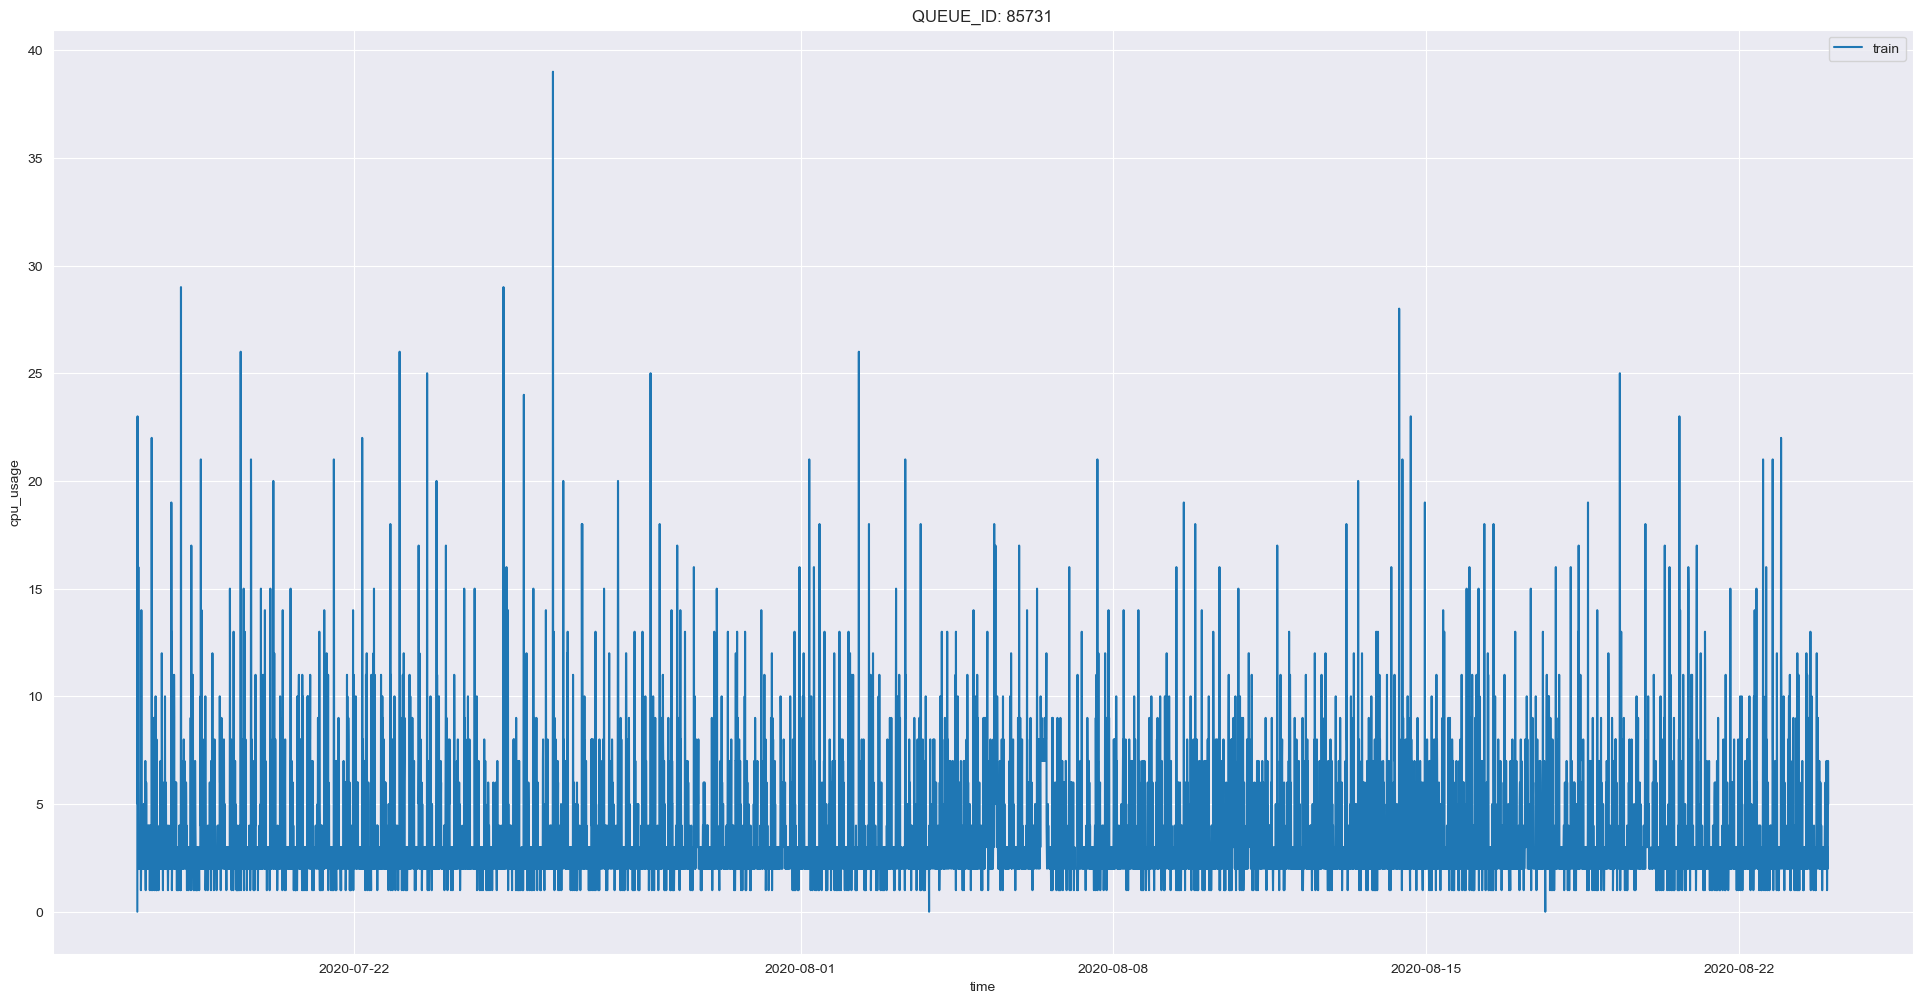

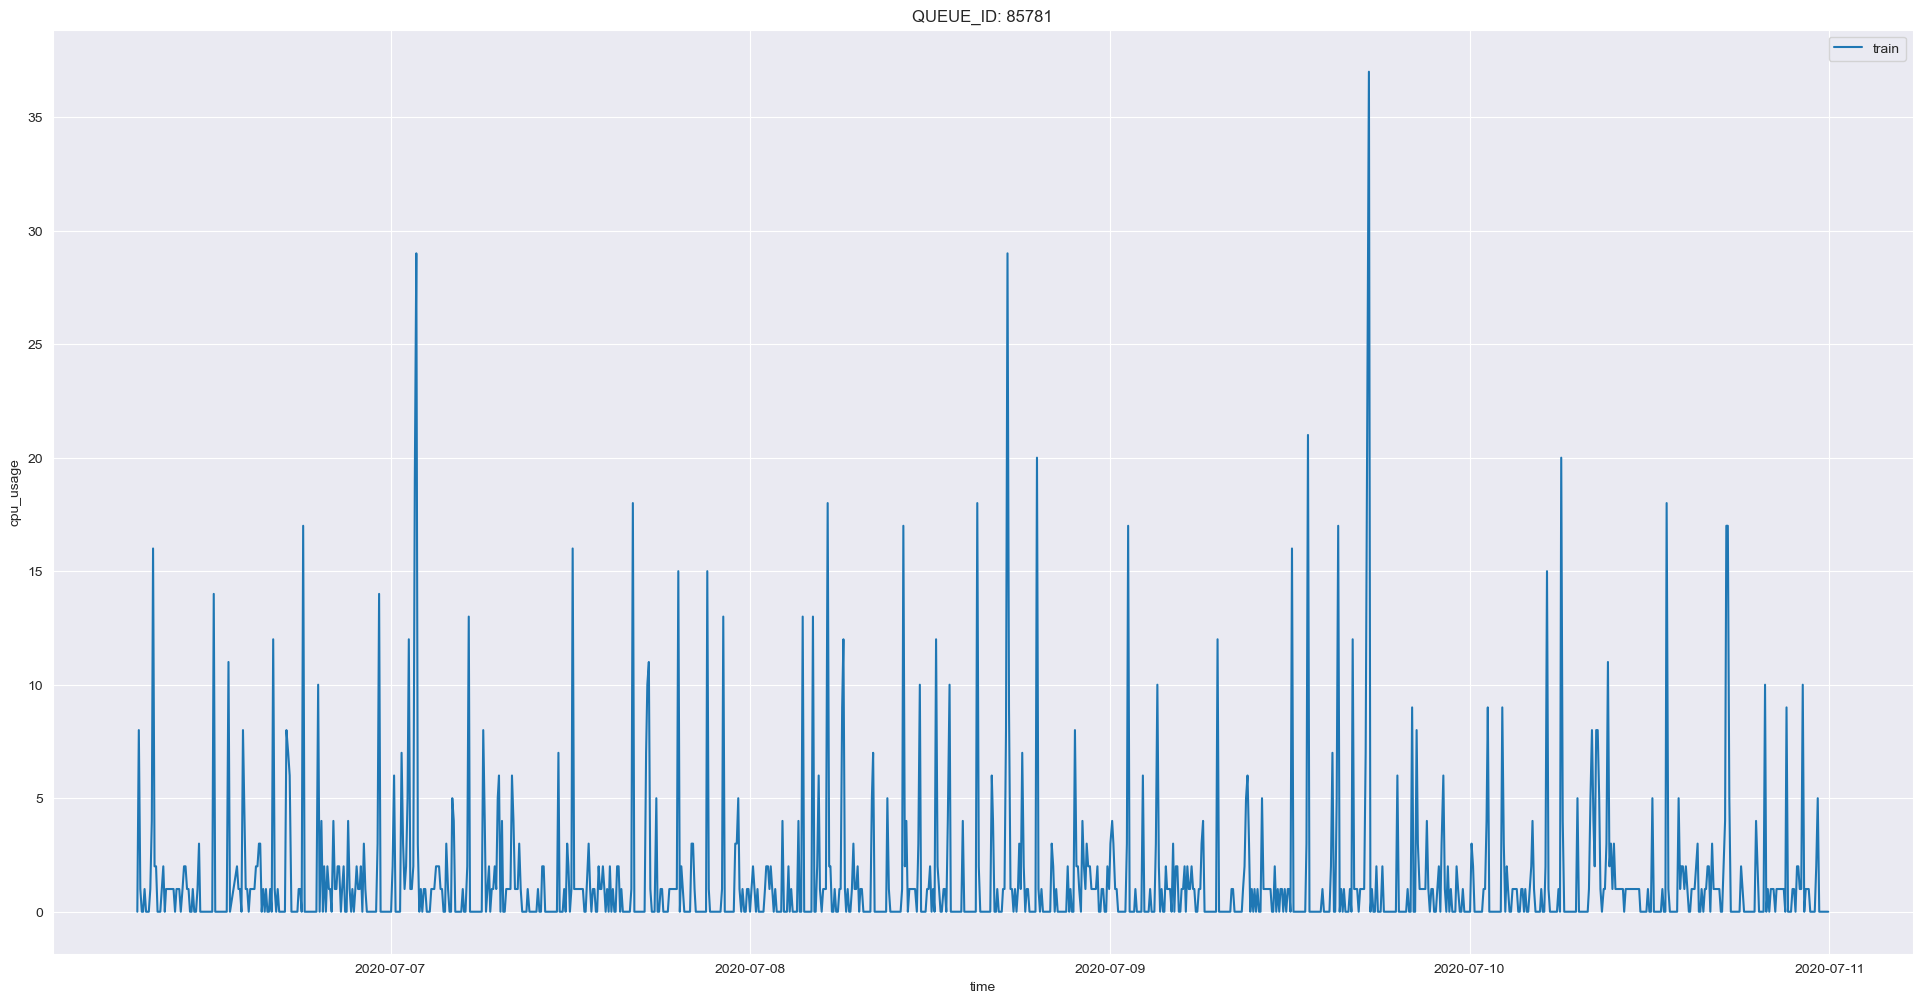

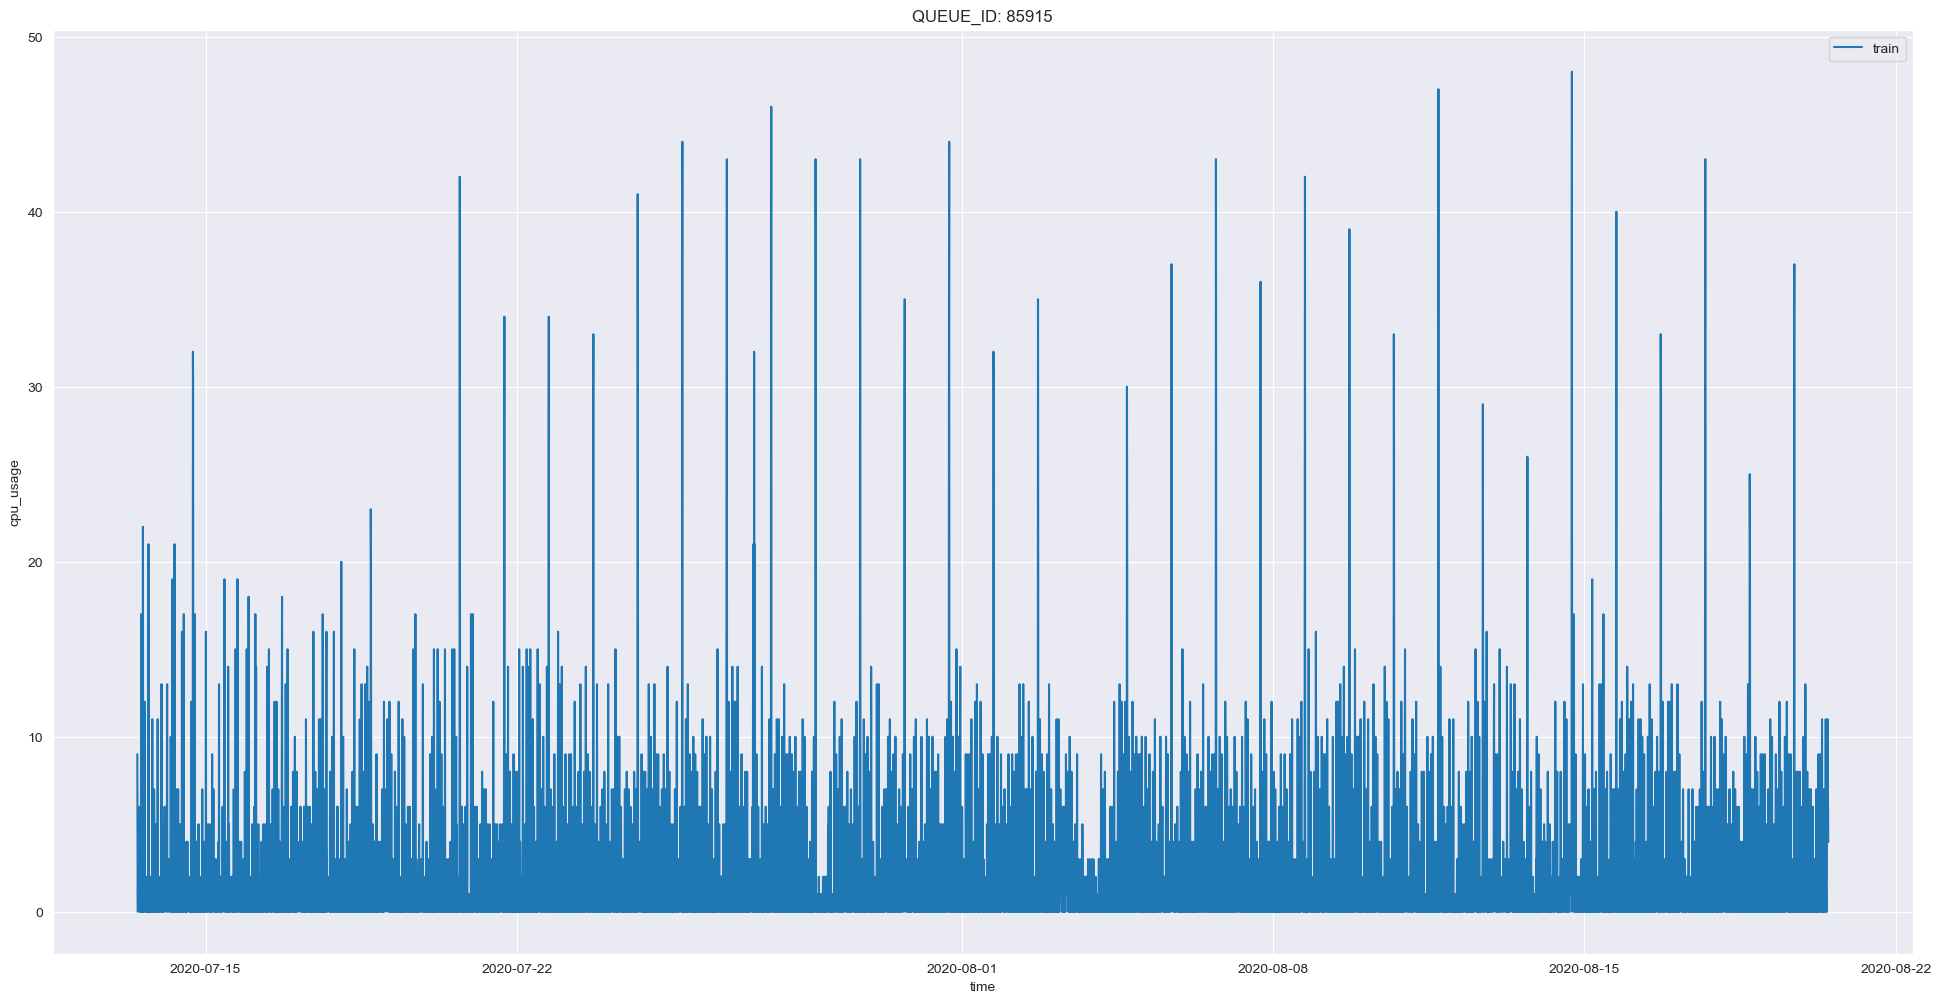

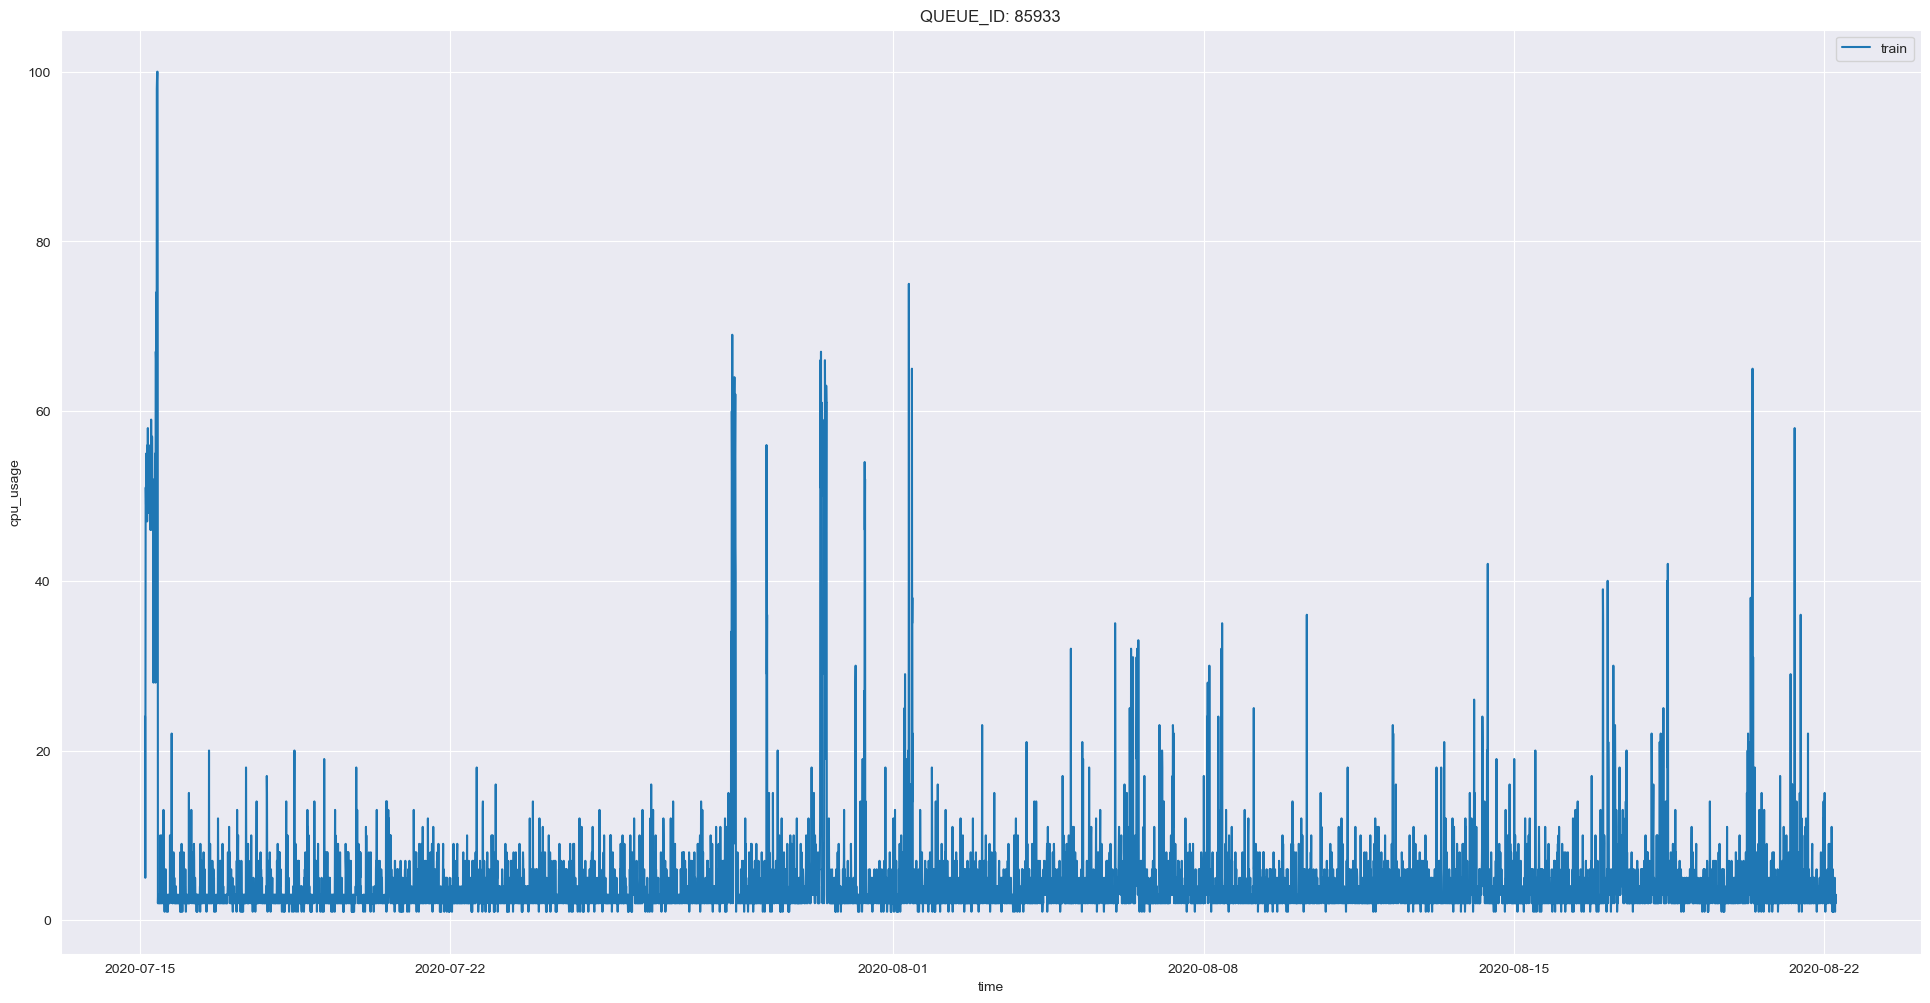

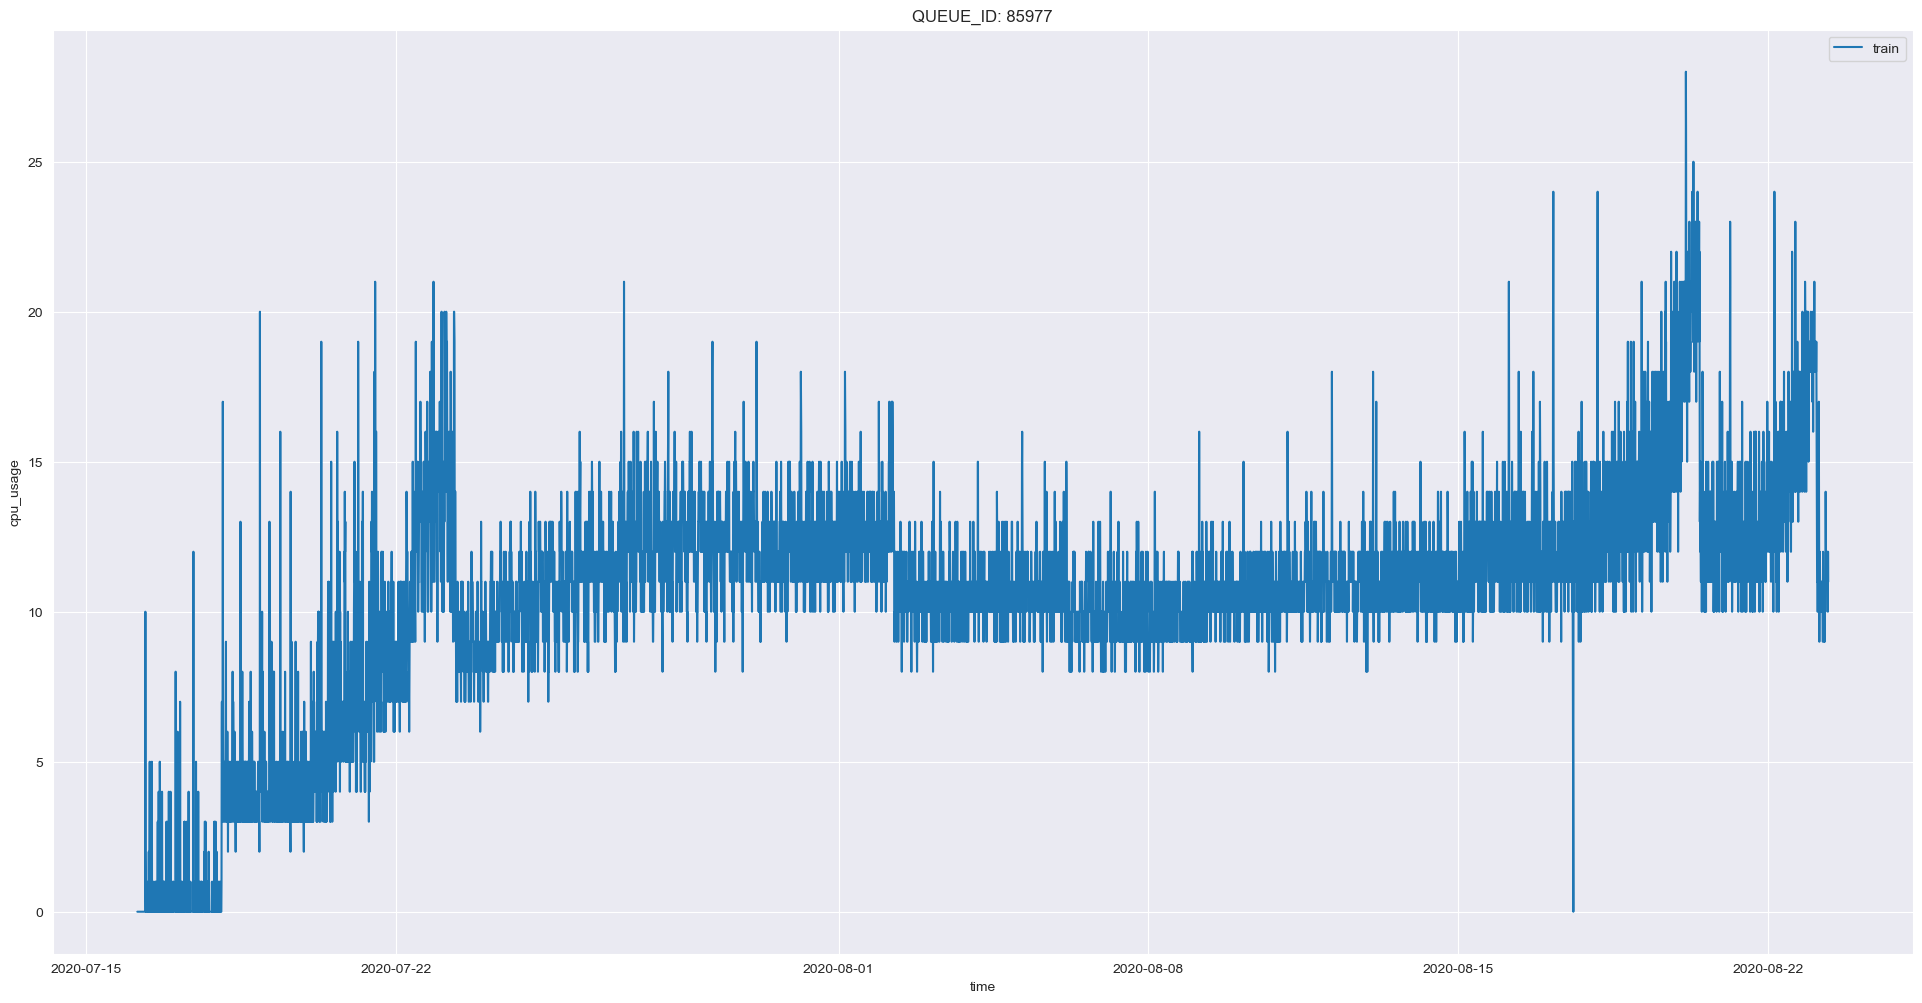

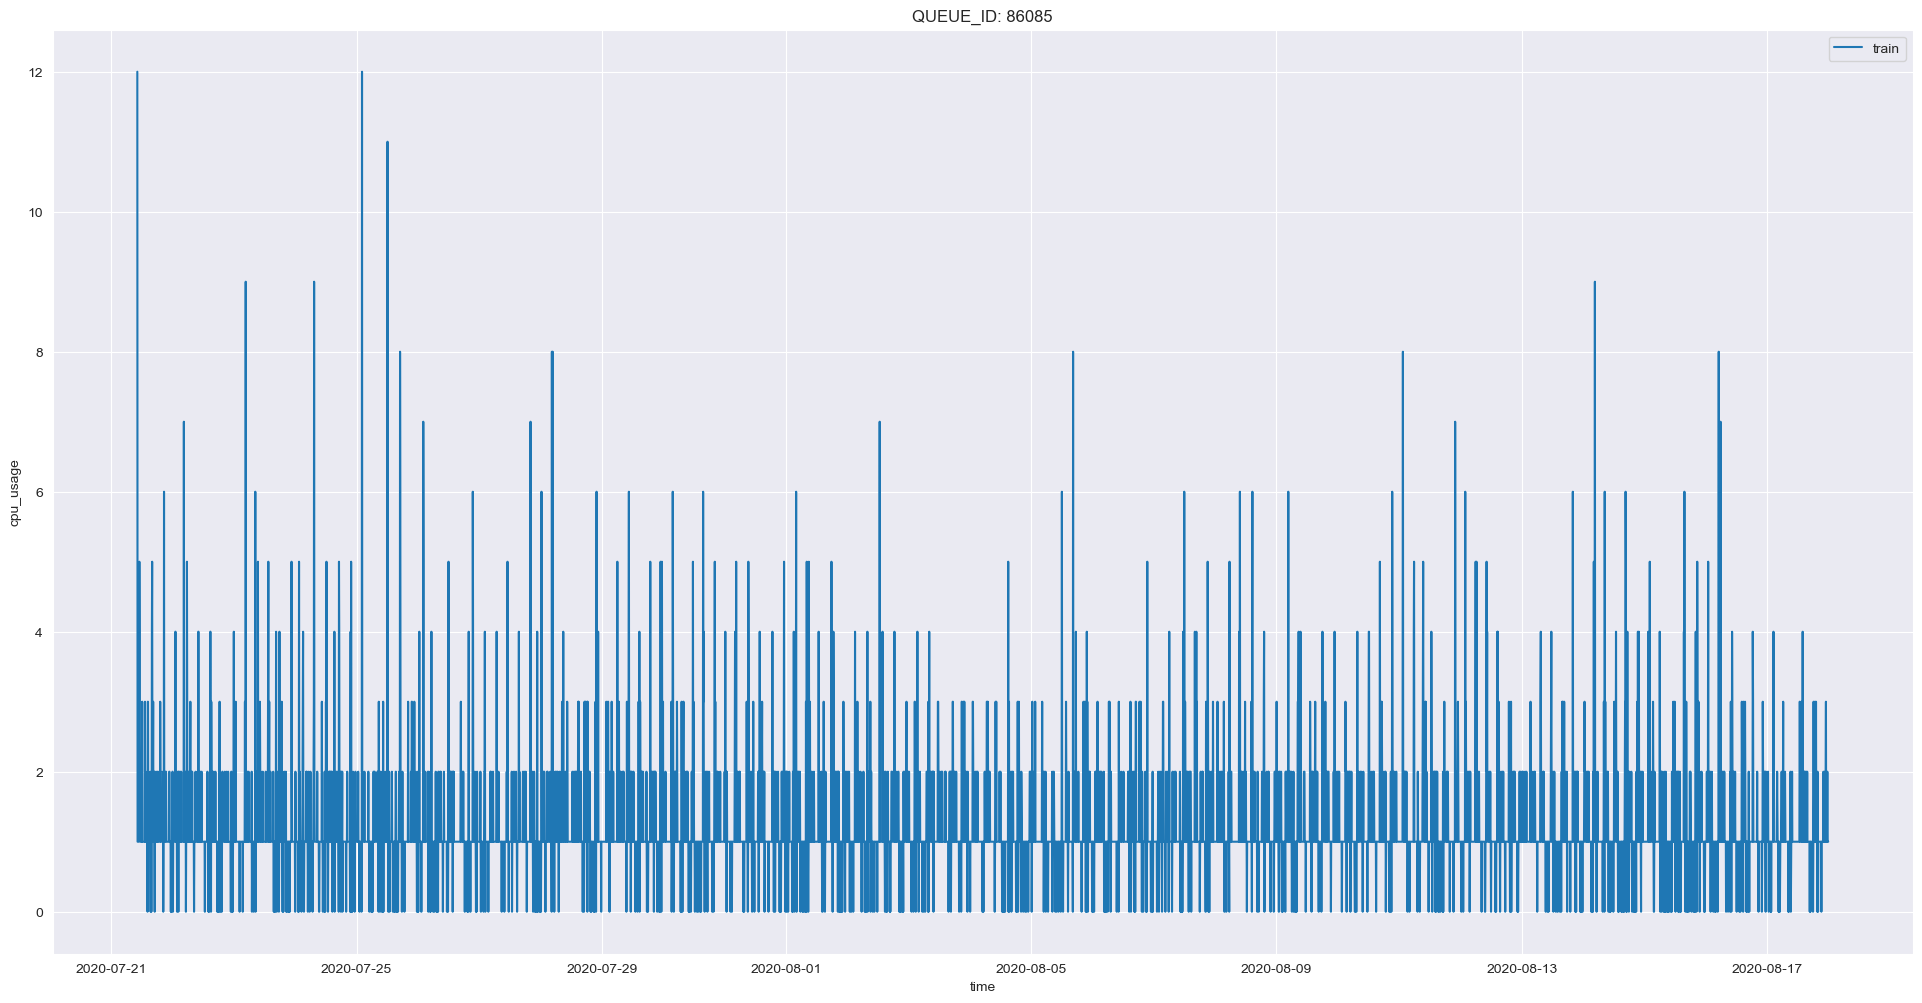

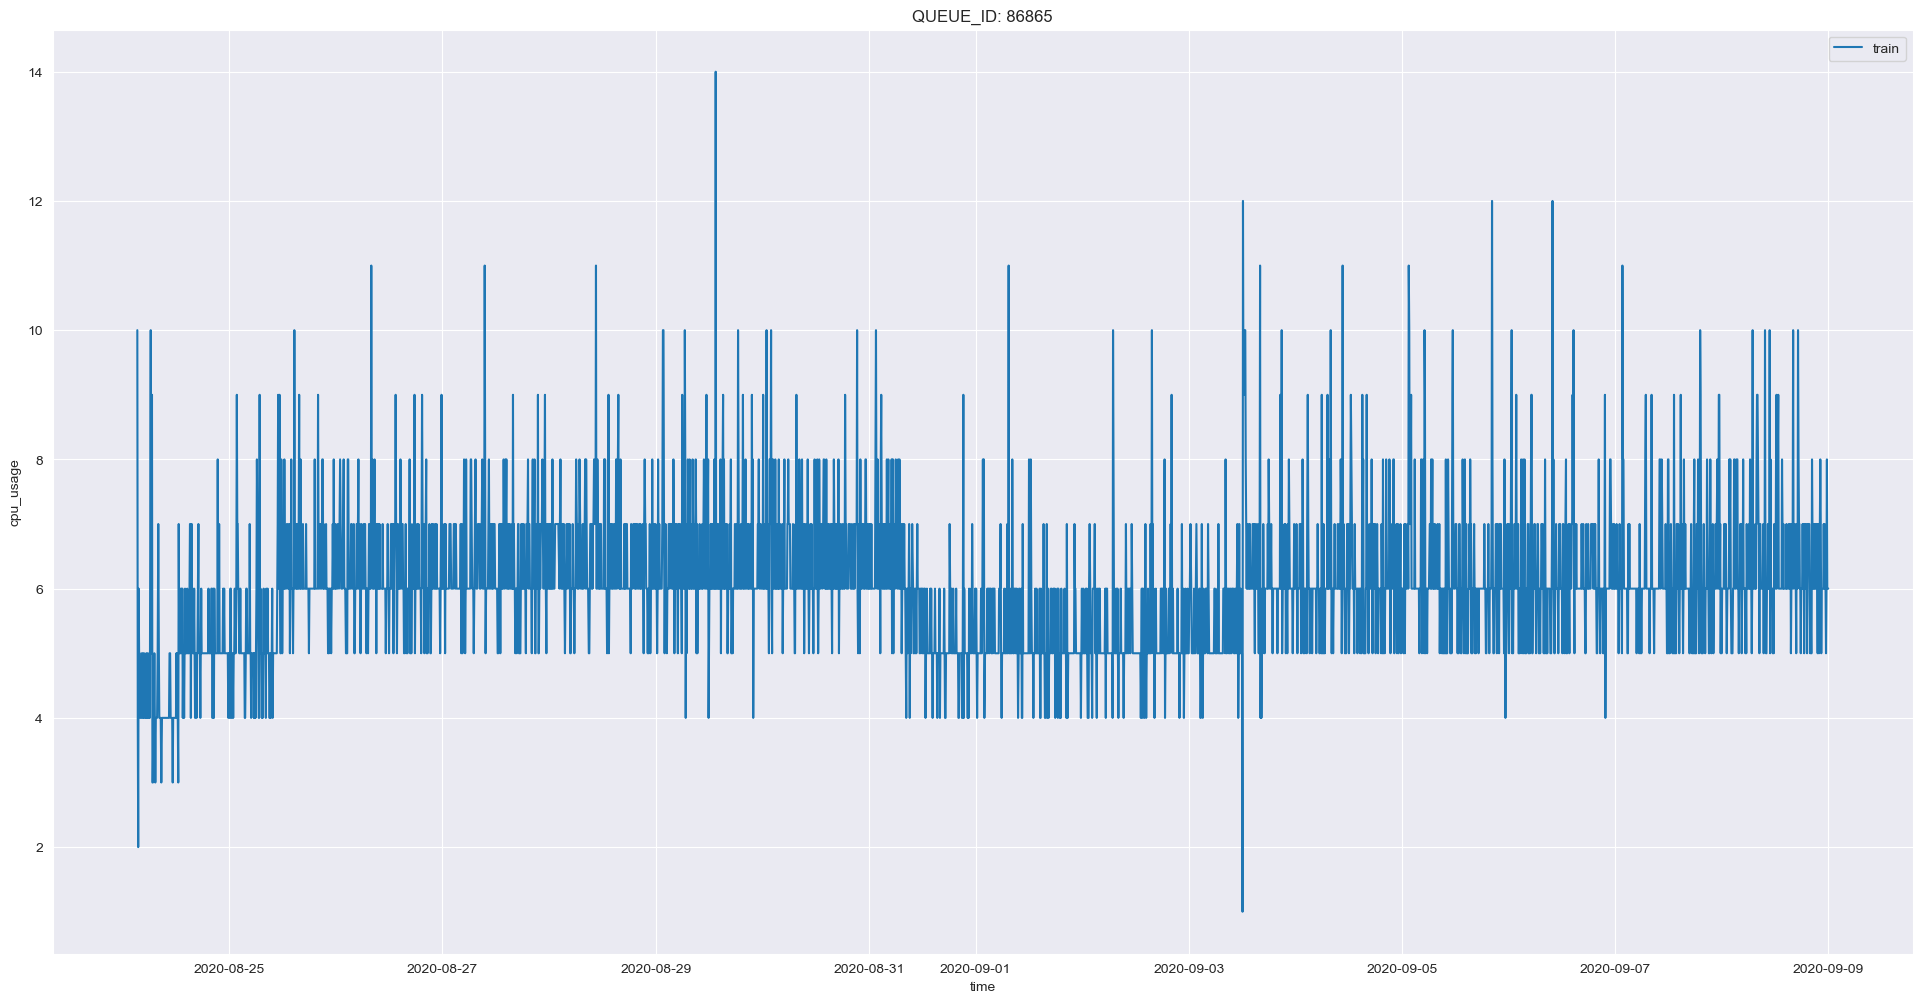

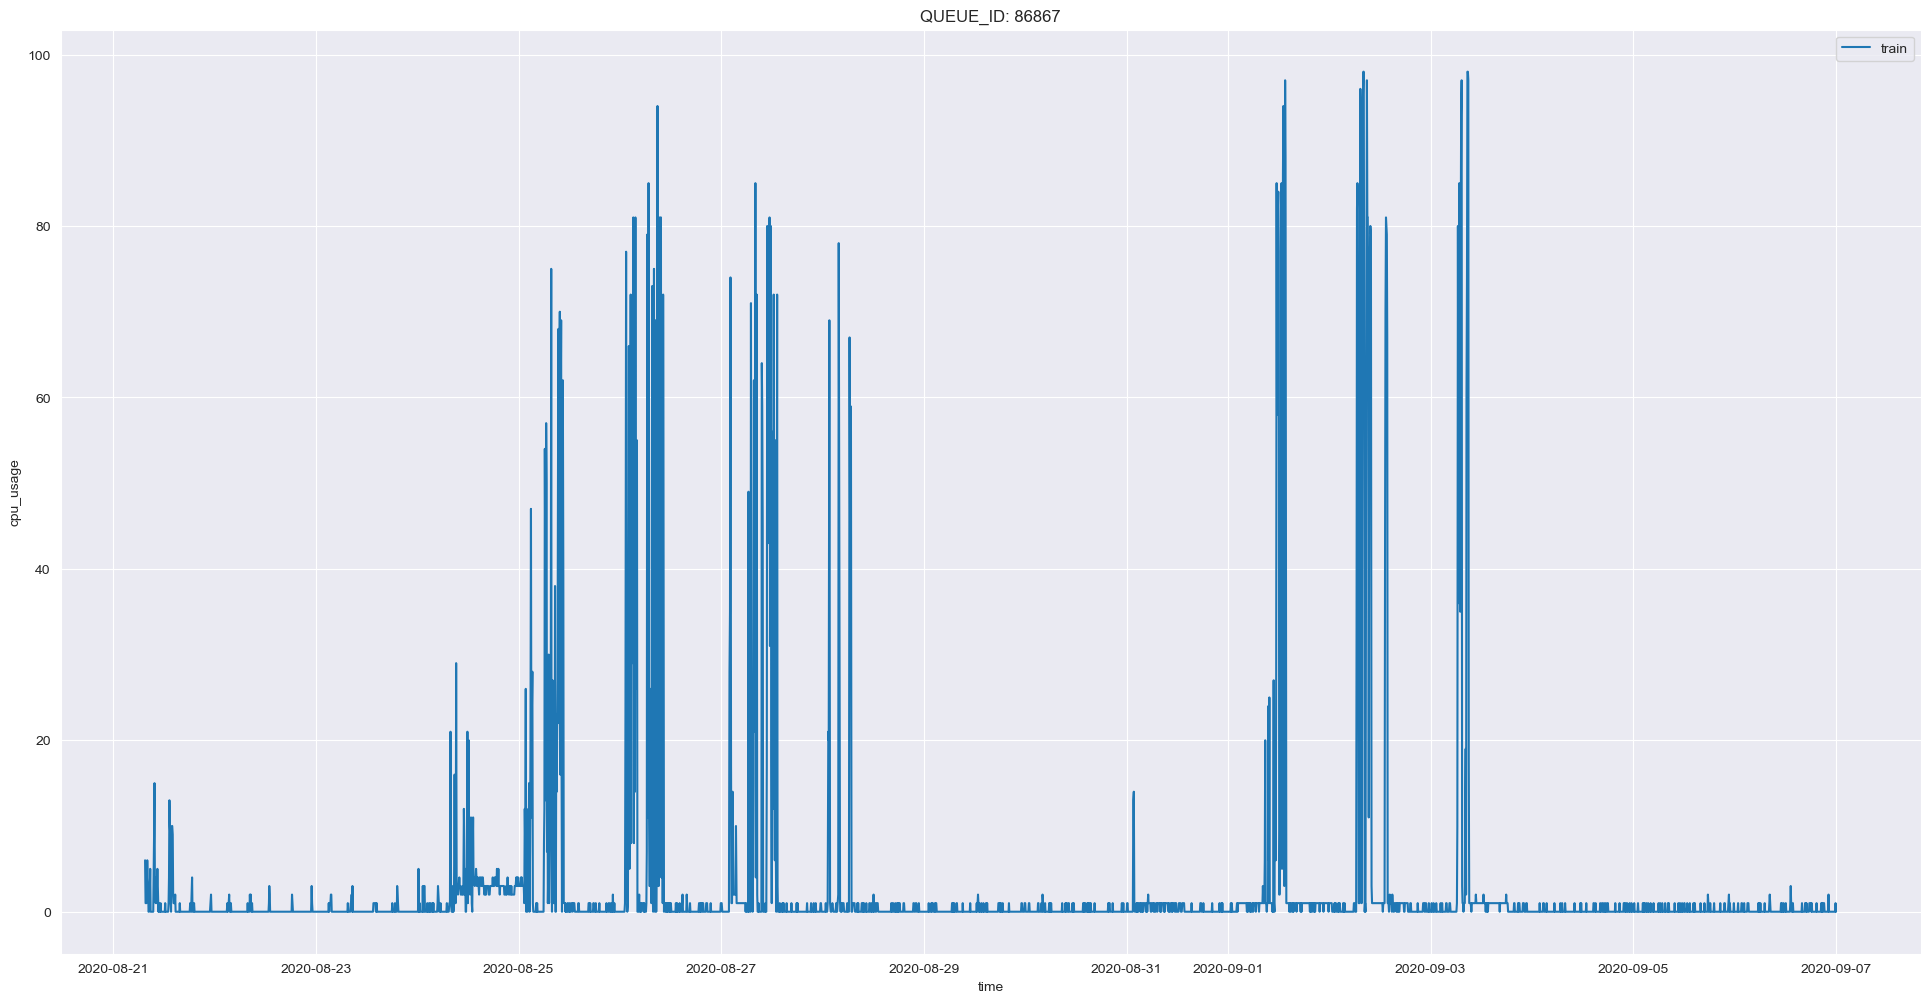

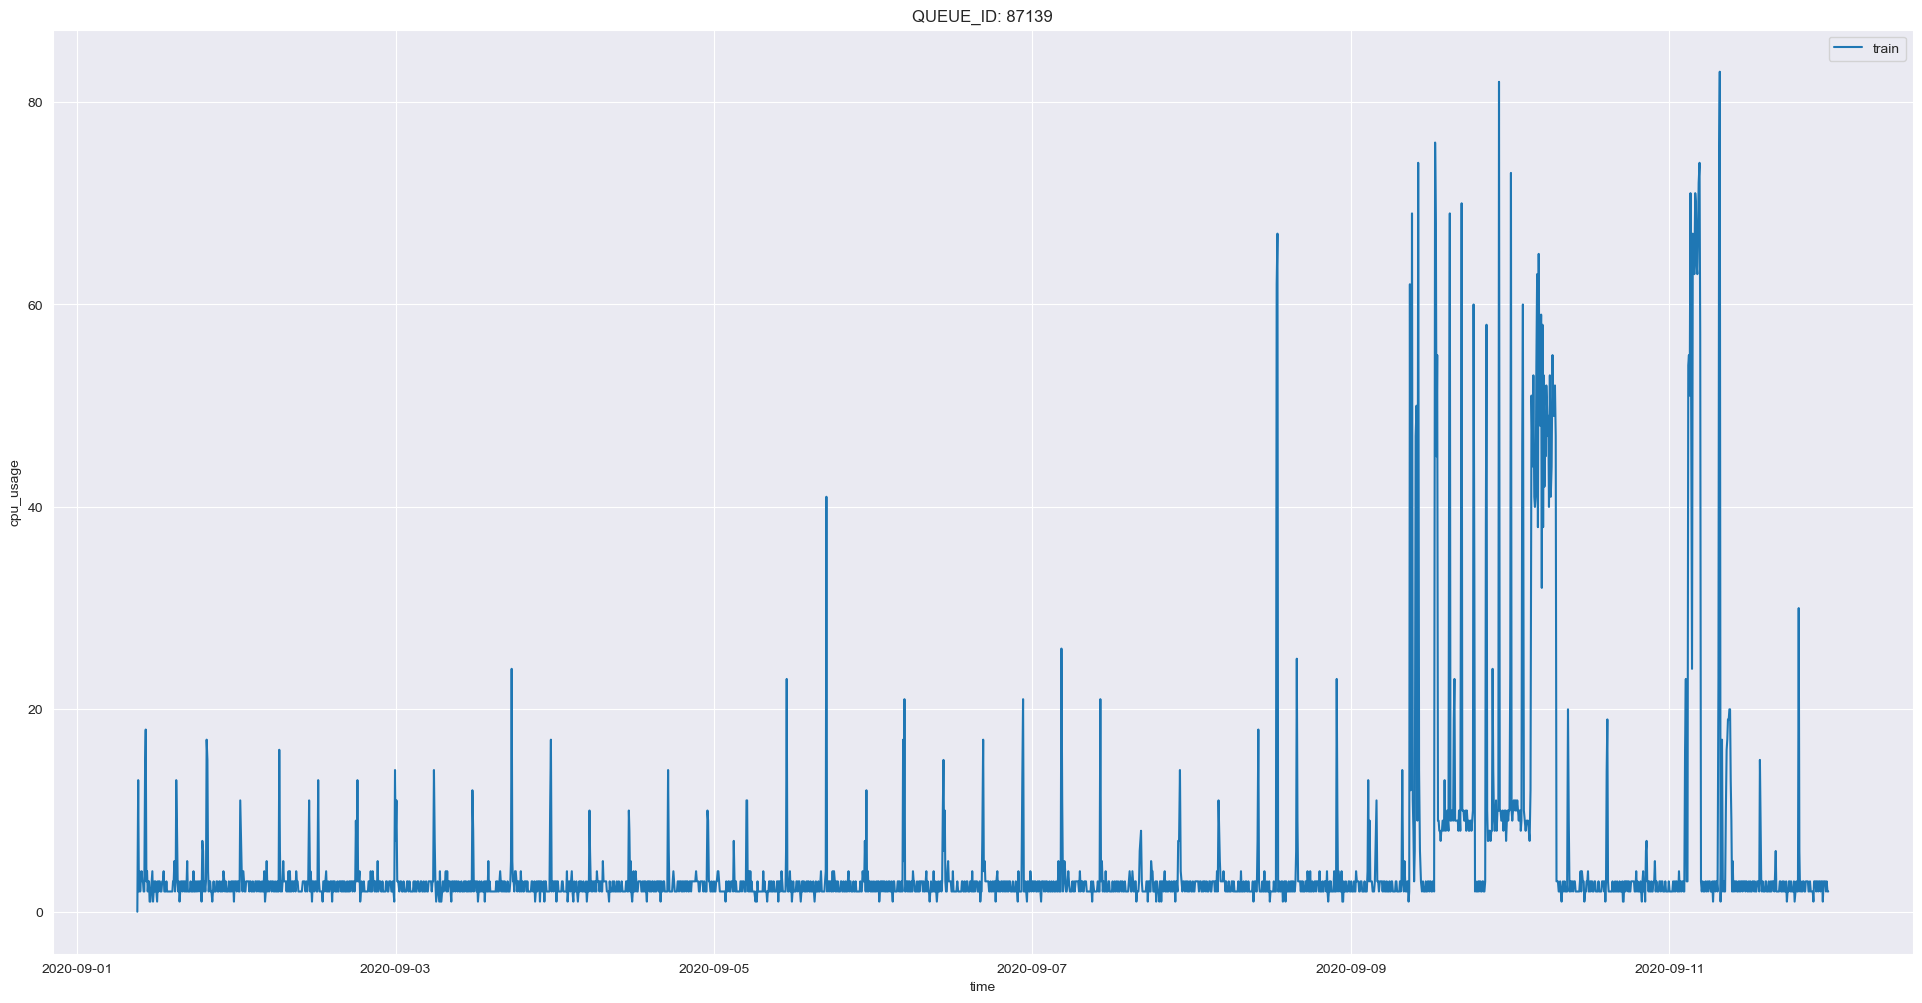

In [13]:
# 不同队列号的CPU占用率随时间变化
queues = [2, 3, 4, 27, 36, 291, 85153, 85693]
# 删 [26, 281, 297, 298, 20889, 21487, 21671, 21673, 81221, 84151, 83609, 85617]
# 一周
time_range = 12 * 24 * 30
for i in range(len(queues)):
    queue_id = queues[i]
    queue_df = train_df[train_df.QUEUE_ID == queue_id]
    if i == 0:
        display(queue_df)
    # 处理时间
    for df in [queue_df]:
        t = pd.to_datetime(df['DOTTING_TIME'], unit='ms')
        df['DOTTING_TIME'] = t

    times = queue_df['DOTTING_TIME']

    plt.figure(figsize=(24, 12))
    plt.title('QUEUE_ID: {}'.format(queue_id))
    plt.ylabel('cpu_usage')
    plt.xlabel('time')
    plt.grid(True)
    plt.plot(times[:time_range], queue_df['CPU_USAGE'][:time_range], label='train')
    plt.legend()  # 显示图例
    plt.show()

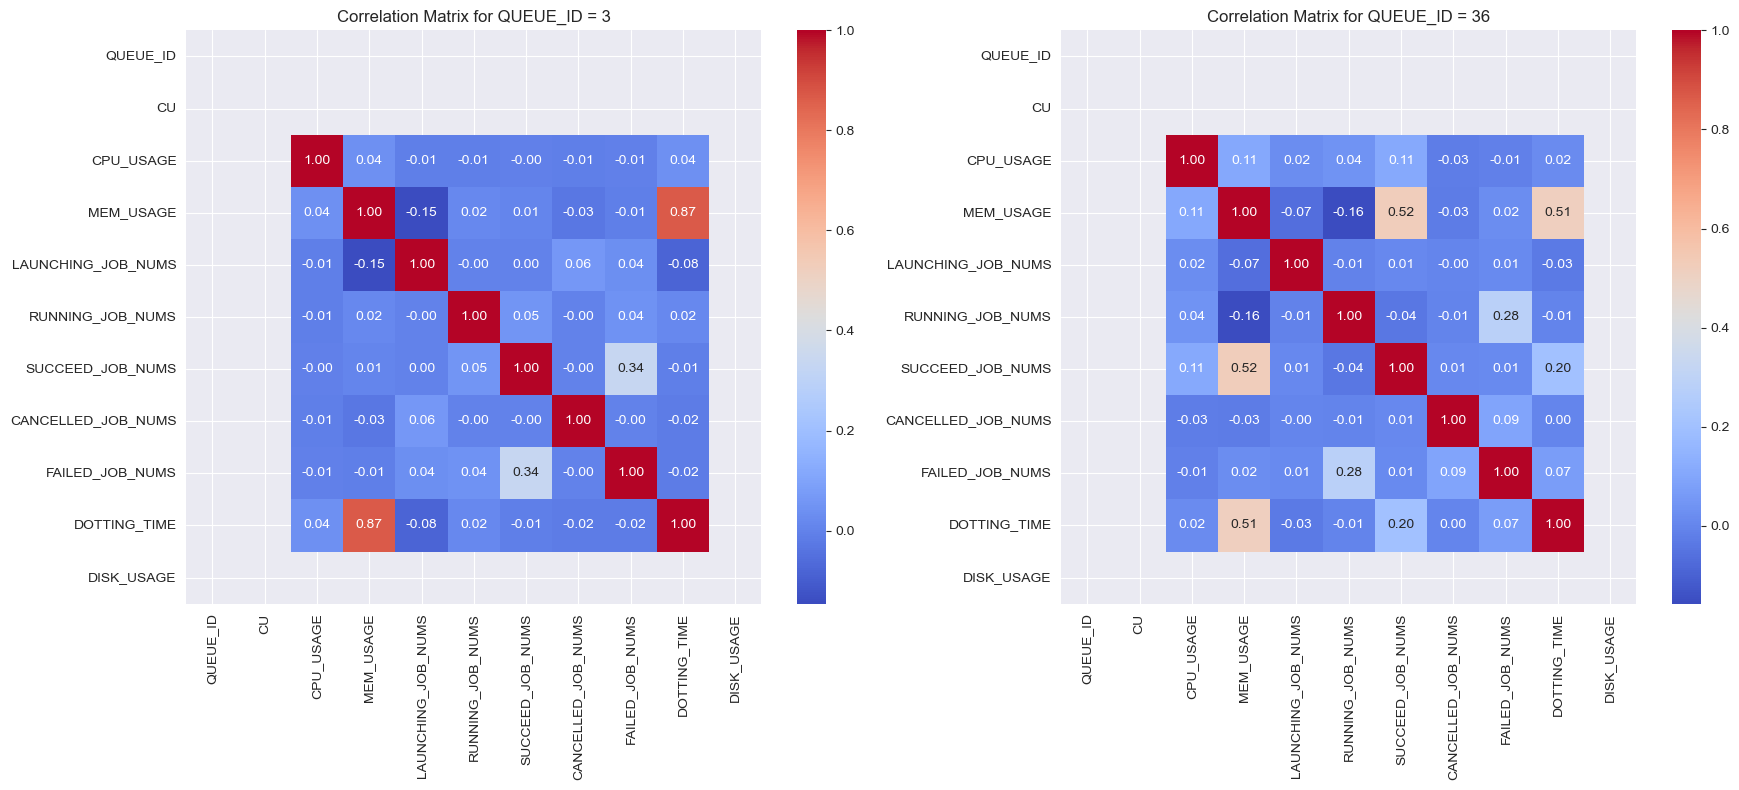

In [10]:
# 相关性分析
# Filtering the dataset for QUEUE_ID = 3 and QUEUE_ID = 36
data_queue_3 = train_df[train_df['QUEUE_ID'] == 3]
data_queue_36 = train_df[train_df['QUEUE_ID'] == 36]

# Calculating the correlation matrices
correlation_matrix_3 = data_queue_3.select_dtypes(include=['int64', 'float64']).corr()
correlation_matrix_36 = data_queue_36.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrices
plt.figure(figsize=(18, 8))

# Correlation matrix for QUEUE_ID = 3
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_3, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for QUEUE_ID = 3")

# Correlation matrix for QUEUE_ID = 36
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_36, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for QUEUE_ID = 36")

plt.tight_layout()
plt.show()


In [6]:
# 计算 QUEUE_TYPE 列中不同值的数量
for col in ['QUEUE_ID', 'QUEUE_TYPE', 'PLATFORM', 'RESOURCE_TYPE', 'DISK_USAGE', 'CU']:
    print(col, '列中不同值的数量为:', train_df[col].unique())

QUEUE_ID 列中不同值的数量为: [    2     3     4    26    27    36   233   281   287   291   293   297
   298 20889 21487 21671 21673 21825 81221 82695 82697 82929 83109 83609
 84151 84387 84907 85101 85153 85265 85267 85617 85619 85693 85731 85781
 85915 85933 85977 86085 86865 86867 87139]
QUEUE_TYPE 列中不同值的数量为: ['sql' 'general' 'spark']
PLATFORM 列中不同值的数量为: ['x86_64' 'aarch64']
RESOURCE_TYPE 列中不同值的数量为: ['vm' nan 'container']
DISK_USAGE 列中不同值的数量为: [20. 23. 24. 25. 26.  0. 27. 28. 29. nan  9.  8. 17. 19. 18.  5.  2.  6.
  7.  4. 10. 21.]
CU 列中不同值的数量为: [  16 1024  512   64  960  256   32   48  112  128]


In [16]:
# 查看每个queue_id对应有多少数据
q_ids = train_df['QUEUE_ID'].value_counts().sort_index()
display(q_ids)
q_ids.to_csv('./data/serverless/q_ids.csv', encoding="utf-8", index=True)

QUEUE_ID
2        19255
3        19257
4        19257
26       10407
27       10526
36        3242
233       2099
281      10365
287       6876
291       8884
293       8855
297      21184
298      20381
20889    14005
21487    28931
21671    28095
21673    19726
21825    19723
81221    19781
82695    19726
82697    10642
82929    10199
83109     8958
83609     2120
84151    11857
84387    17520
84907     6495
85101     6618
85153    14353
85265    13516
85267    13082
85617     2553
85619     9997
85693    10834
85731     8568
85781     1149
85915     9220
85933     8811
85977     8793
86085     6195
86865     3544
86867     3753
87139     2378
Name: count, dtype: int64